In [1]:
import os
import pandas as pd

In [2]:
extracted_path_ba = '/content/BeerReviews/BeerAdvocate'
extracted_path_rb = '/content/BeerReviews/RateBeer'
extracted_path_mbd = '/content/BeerReviews/MatchedData'

if not os.path.exists(extracted_path_ba):
  os.makedirs(extracted_path_ba)

if not os.path.exists(extracted_path_rb):
  os.makedirs(extracted_path_rb)

if not os.path.exists(extracted_path_mbd):
    os.makedirs(extracted_path_mbd)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# We have to extract files into this folder - from BeerAdvocate

!tar -xvf /content/drive/MyDrive/Beer\ reviews/BeerAdvocate.tar.gz -C /content/BeerReviews/BeerAdvocate

beers.csv
reviews.txt.gz


In [ ]:
!tar -xvf /content/drive/MyDrive/Beer\ reviews/RateBeer.tar.gz -C /content/BeerReviews/RateBeer

In [ ]:
!tar -xvf /content/drive/MyDrive/Beer\ reviews/matched_beer_data.tar.gz -C /content/BeerReviews/MatchedData

### What's behind the data
Can we use this data for linking political state in the US to the beer preferences?
At first, we have to check what portion of these datasets corresponds to the US...

# Beer Advocate


In [ ]:
# Beer data - we have information about the brewery name!
beers_advocate = pd.read_csv('/content/BeerReviews/BeerAdvocate/beers.csv')
len(beers_advocate)

In [ ]:
beers_advocate[beers_advocate['beer_name'] == 'Punk IPA']

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
1985,39435,Punk IPA,16315,BrewDog,American IPA,1800,556,3.75,85.0,90.0,5.6,3.842506,NaN,0,NaN


In [ ]:
# Information about breweries - name is linked to the location, which we need!
breweries_advocate = pd.read_csv('/content/BeerReviews/BeerAdvocate/breweries.csv')
breweries_advocate.sample(50)

,id,location,name,nbr_beers
5778,33127,Ecuador,Sol del Venado,4
15121,3219,France,Brasserie La Saint-Pierre,16
15331,28920,"United States, California",Haven Gastropub,35
13842,44381,"United States, Texas",Neches Brewing Company,9
12994,39610,"United States, Ohio",Hofbräuhaus Cleveland,1
16229,26768,"United States, Oregon",Bull Ridge Brewpub,1
14562,48556,Belgium,Bier Butlers,2
7432,13629,Finland,Malmgårdin Panimo,36
13372,44340,"United States, Oregon",Vanguard Brewing Company,26
3405,5709,Germany,Arcobräu Gräfliches Brauhaus,18


How many beers do we have that come from the US?

In [ ]:
beer_with_location = pd.merge(beers_advocate, breweries_advocate, left_on='brewery_id', right_on='id')
ny_beers = beer_with_location[beer_with_location['location'] == 'United States, New York'].sort_values(by='nbr_ratings', ascending=False)
ny_beers.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,id,location,name,nbr_beers
129056,38394,Pumking,3818,Southern Tier Brewing Company,Pumpkin Ale,7500,1951,4.01,90.0,81.0,8.6,4.049132,NaN,0,NaN,3818,"United States, New York",Southern Tier Brewing Company,145
119949,680,Brooklyn Black Chocolate Stout,45,Brooklyn Brewery,Russian Imperial Stout,6676,2810,4.15,93.0,91.0,10.0,4.149348,0.495761,2861,4.151234,45,"United States, New York",Brooklyn Brewery,181
119743,3457,Three Philosophers Belgian Style Blend (Quadru...,42,Brewery Ommegang,Quadrupel (Quad),6430,2101,4.12,92.0,91.0,9.7,4.149574,NaN,0,NaN,42,"United States, New York",Brewery Ommegang,104
119692,141,Hennepin (Farmhouse Saison),42,Brewery Ommegang,Saison / Farmhouse Ale,6004,2176,4.17,93.0,96.0,7.7,4.151939,NaN,0,NaN,42,"United States, New York",Brewery Ommegang,104
127802,6076,Flower Power India Pale Ale,651,Ithaca Beer Company,American IPA,5272,1288,4.17,93.0,NaN,7.5,4.226168,NaN,0,NaN,651,"United States, New York",Ithaca Beer Company,193


In [ ]:
# We want to see from the merged table beer_with_location how many beers do we have from the US

us_beers = beer_with_location[beer_with_location['location'].str.startswith('United States')]
print(f"Number of beers from the US: {len(us_beers)}")

Number of beers from the US: 204752


<Axes: xlabel='location'>

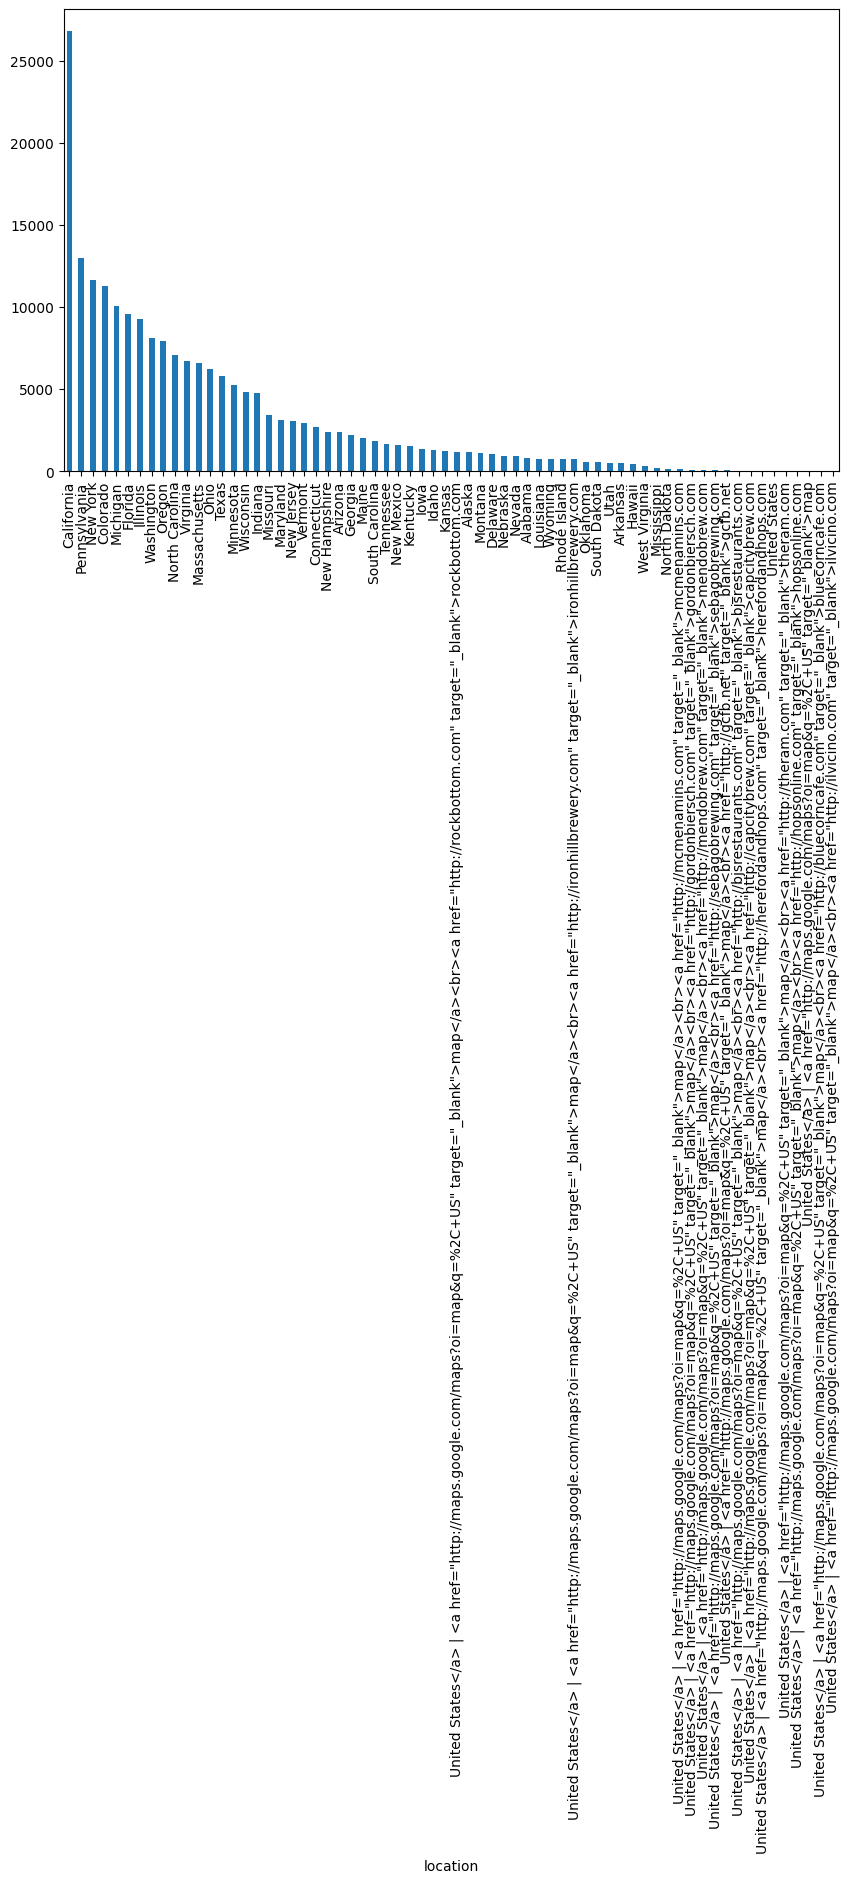

In [ ]:
# And from which states? How many?

us_states = us_beers['location'].str.split(', ').str[-1].value_counts()
#us_states

# Histogram showing the number of states
us_states.plot(kind='bar', figsize=(10, 6))

In [ ]:
users_beer_advocate = pd.read_csv('/content/BeerReviews/BeerAdvocate/users.csv')
users_beer_advocate['joined'] = pd.to_datetime(users_beer_advocate['joined'], unit='ms')
#users_beer_advocate.head(10)
print("We have information about", len(users_beer_advocate), "users")

We have information about 153704 users


How many users do come from the US?

In [ ]:
# Some locations are NaN - we get rid of them
users_beer_advocate.location.isna().sum()
users_beer_advocate.dropna(subset=['location'], inplace=True)

# Check how many of them come from the US
us_users = users_beer_advocate[users_beer_advocate['location'].str.startswith('United States')]
print(f"Number of users from the US: {len(us_users)}")


Number of users from the US: 113223


<Axes: xlabel='location'>

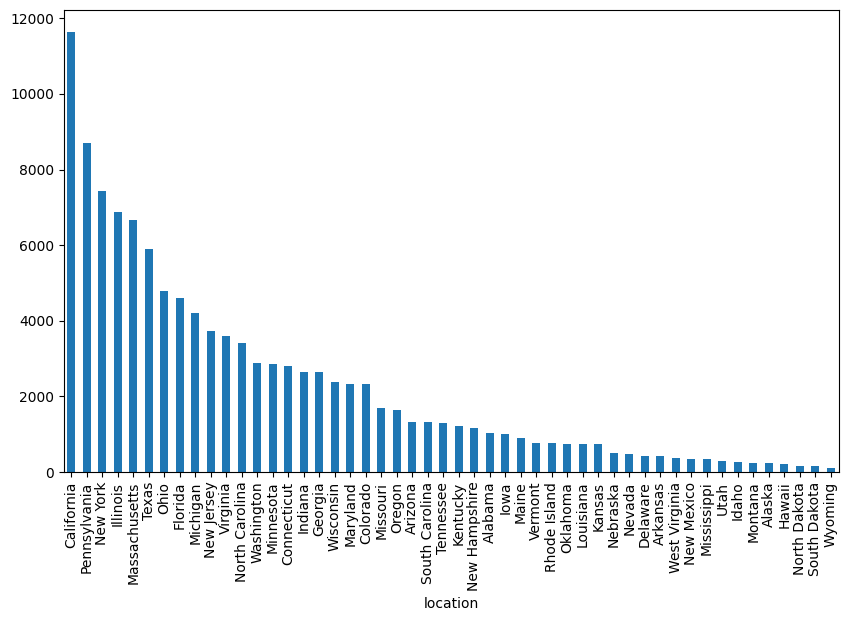

In [ ]:
# And from which states? How many?

us_states = us_users['location'].str.split(', ').str[-1].value_counts()
#us_states

# Histogram showing the number of states
us_states.plot(kind='bar', figsize=(10, 6))

# Reviews - not working

In [ ]:
!gzip -dc /content/BeerReviews/BeerAdvocate/reviews.txt.gz > /content/BeerReviews/BeerAdvocate/reviewes_beer_adv.txt

In [ ]:
with open('/content/BeerReviews/BeerAdvocate/reviewes_beer_adv.txt', 'r') as file:
    for _ in range(20):  # Read first 10 lines
        print(file.readline())

beer_name: Régab

beer_id: 142544

brewery_name: Societe des Brasseries du Gabon (SOBRAGA)

brewery_id: 37262

style: Euro Pale Lager

abv: 4.5

date: 1440064800

user_name: nmann08

user_id: nmann08.184925

appearance: 3.25

aroma: 2.75

palate: 3.25

taste: 2.75

overall: 3.0

rating: 2.88

text: From a bottle, pours a piss yellow color with a fizzy white head.  This is carbonated similar to soda.The nose is basic.. malt, corn, a little floral, some earthy straw.  The flavor is boring, not offensive, just boring.  Tastes a little like corn and grain.  Hard to write a review on something so simple.Its ok, could be way worse.



beer_name: Barelegs Brew

beer_id: 19590

brewery_name: Strangford Lough Brewing Company Ltd



In [ ]:
# We need to parse manually data to put it into pandas dataframe
data = []

# Read the entire file as a string
with open('/content/BeerReviews/BeerAdvocate/reviewes_beer_adv.txt', 'r') as file:
    content = file.read()

# Split the content by double newlines to get individual rows
rows = content.strip().split('\n\n')


# RateBeer
Check how much beers, breweries, users, reviews we have from the US!!

In [ ]:
# Beer data - we have information about the brewery name!
beers_rate = pd.read_csv('/content/BeerReviews/RateBeer/beers.csv')
beers_rate.head(10)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,NaN,NaN,2.72,5.0,2.000000,NaN,0,NaN
1,105273,Castel Beer (Gabon),3198,Sobraga,Pale Lager,10,5.0,58.0,2.18,5.2,1.910000,NaN,0,NaN
2,19445,Régab,3198,Sobraga,Pale Lager,27,1.0,22.0,1.83,4.5,1.811111,NaN,0,NaN
3,155699,Ards Bally Black Stout,13538,Ards Brewing Co.,Stout,6,NaN,NaN,3.18,4.6,3.866667,0.823699,6,3.866667
4,239097,Ards Belfast 366,13538,Ards Brewing Co.,Golden Ale/Blond Ale,1,NaN,NaN,2.79,4.2,3.000000,NaN,0,NaN
5,380930,Ards Bittles Christmas,13538,Ards Brewing Co.,Bitter,1,NaN,NaN,3.02,4.2,3.400000,NaN,0,NaN
6,234108,Ards Bittles Citra Autumn Ale,13538,Ards Brewing Co.,American Pale Ale,1,NaN,NaN,2.84,5.1,3.400000,NaN,0,NaN
7,396830,Ards Cardy Man,13538,Ards Brewing Co.,Stout,1,NaN,NaN,2.96,4.2,3.100000,NaN,0,NaN
8,256772,Ards Hip Hop,13538,Ards Brewing Co.,American Pale Ale,1,NaN,NaN,2.88,5.2,3.700000,NaN,0,NaN
9,160664,Ards Pig Island Pale Ale,13538,Ards Brewing Co.,Bitter,4,NaN,NaN,2.96,5.2,3.650000,0.435649,4,3.650000


In [ ]:
# Information about breweries - name is linked to the location, which we need!
breweries_rate = pd.read_csv('/content/BeerReviews/RateBeer/breweries.csv')
breweries_rate.sample(5)

,id,location,name,nbr_beers
10480,5582,South Africa,Farmers Brauhaus,2
2593,10251,Lithuania,Vilniaus Alus,37
11686,18783,Serbia,Metalflex,1
13980,10946,"United States, California",Pabst Brewing Company,128
11434,27045,Netherlands,Wilskracht Stadsbrouwerij Ravenstein,7


In [ ]:
beer_with_location = pd.merge(beers_rate, breweries_rate, left_on='brewery_id', right_on='id')
# We want to see from the merged table beer_with_location how many beers do we have from the US

us_beers = beer_with_location[beer_with_location['location'].str.startswith('United States')]
print(f"Number of beers from the US: {len(us_beers)}")

Number of beers from the US: 224458


<Axes: xlabel='location'>

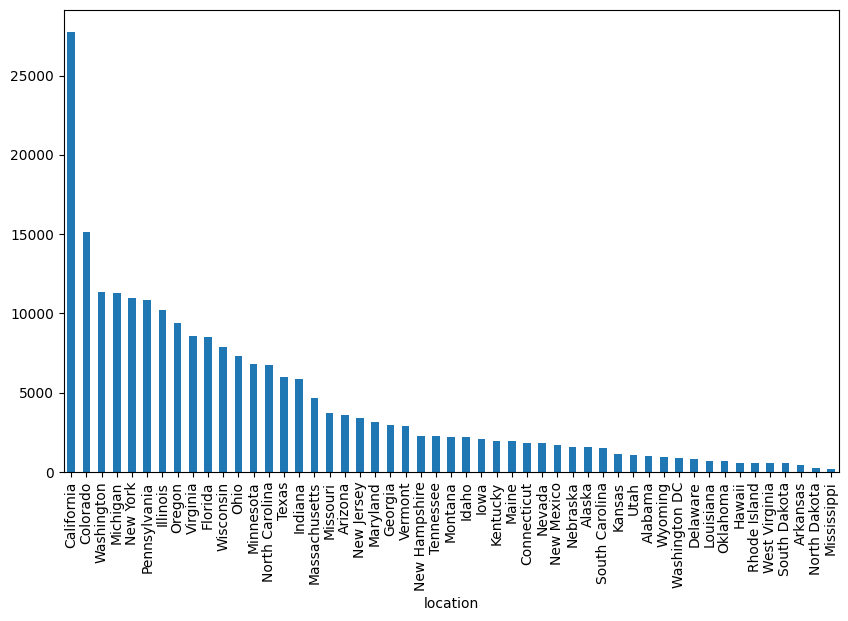

In [ ]:
# And from which states? How many?

us_states = us_beers['location'].str.split(', ').str[-1].value_counts()
#us_states

# Histogram showing the number of states
us_states.plot(kind='bar', figsize=(10, 6))

In [ ]:
users_beer_rate = pd.read_csv('/content/BeerReviews/RateBeer/users.csv')
users_beer_rate['joined'] = pd.to_datetime(users_beer_rate['joined'], unit='ms')
#users_beer_advocate.head(10)
print("We have information about", len(users_beer_rate), "users")

We have information about 70174 users


In [ ]:
# Check how many of them come from the US
us_users = users_beer_rate[users_beer_rate['location'].str.startswith('United States')]
print(f"Number of users from the US: {len(us_users)}")

Number of users from the US: 26855


<Axes: xlabel='location'>

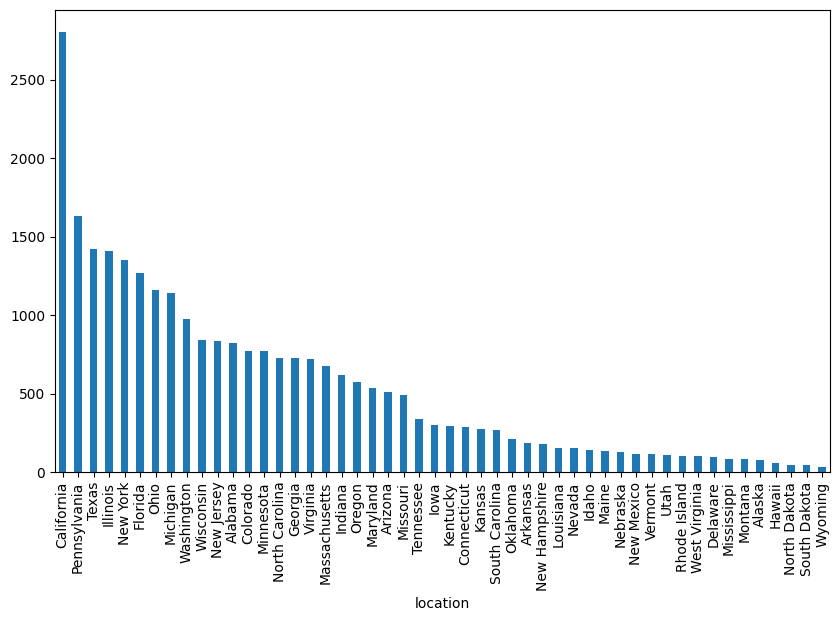

In [ ]:
# And from which states? How many?

us_states = us_users['location'].str.split(', ').str[-1].value_counts()
#us_states

# Histogram showing the number of states
us_states.plot(kind='bar', figsize=(10, 6))